In [1]:
import numpy as np
import pandas as pd
import os

import datetime as dt
import dateutil as du

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Superstore.csv',delimiter=';',
                   parse_dates=['Order Date'],encoding='latin1',decimal=",")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11.11.2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11.11.2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,16.06.2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,18.10.2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,18.10.2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [6]:
df['Segment'][(df['Segment']=='Consumer')].count()

5191

In [7]:
df['Segment'][(df['Segment']=='Corporate')].count()

3020

In [8]:
df['Segment'][(df['Segment']=='Home Office')].count()

1783

In [9]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [10]:
df1 = df[((df['State']=='Tennessee') | (df['State']=='Virginia') | 
          (df['State']=='Missouri')| (df['State']=='Arizona')| 
          (df['State']=='Oklahoma')| (df['State']=='Alabama')|
          (df['State']=='South Carolina')| (df['State']=='Oregon')|
          (df['State']=='Colorado')| (df['State']=='Iowa'))]
df1 = df1[(df1['Category']=='Furniture')]
df1.set_index('Row ID', inplace = True)
cols = ['Order Date','Sales']
data = df1[cols]
data.head()

,Order Date,Sales
Row ID,,
73,2015-04-26,831.936
74,2015-04-26,97.040
86,2017-05-28,301.960
105,2015-11-13,102.360
202,2014-03-08,218.750


In [11]:
data = data.sort_values(by='Order Date')
data.head()

,Order Date,Sales
Row ID,,
2979,2014-01-13,545.94
5466,2014-01-19,181.47
2579,2014-01-26,62.82
2584,2014-01-26,12.42
8920,2014-02-04,177.68


In [12]:
len(data['Order Date'].unique())

187

In [13]:
data['Order Date'].count()

265

In [14]:
by_date = data.groupby(data['Order Date']).sum()
by_date.head()

,Sales
Order Date,
2014-01-13,545.94
2014-01-19,181.47
2014-01-26,75.24
2014-02-04,177.68
2014-03-08,218.75


In [15]:
by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 2014-01-13 to 2017-12-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [16]:
by_date.isnull().any()

Sales    False
dtype: bool

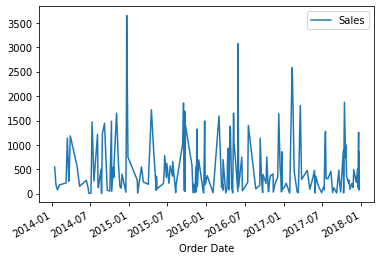

In [17]:
by_date.plot()

In [18]:
by_date.head()

,Sales
Order Date,
2014-01-13,545.94
2014-01-19,181.47
2014-01-26,75.24
2014-02-04,177.68
2014-03-08,218.75


In [19]:
by_date.tail()

,Sales
Order Date,
2017-12-17,504.900
2017-12-19,115.378
2017-12-22,1259.466
2017-12-23,72.704
2017-12-24,850.920


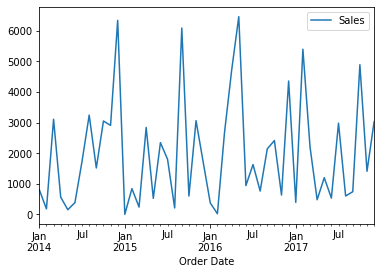

In [20]:
monthly_resampled_data = by_date.resample('M').sum()
monthly_resampled_data.plot()

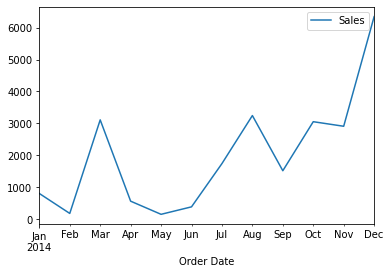

In [21]:
monthly_resampled_data_2014 = by_date['2014-01':'2015-01'].resample('M').sum()
monthly_resampled_data_2014.plot()

In [22]:
from pandas import plotting

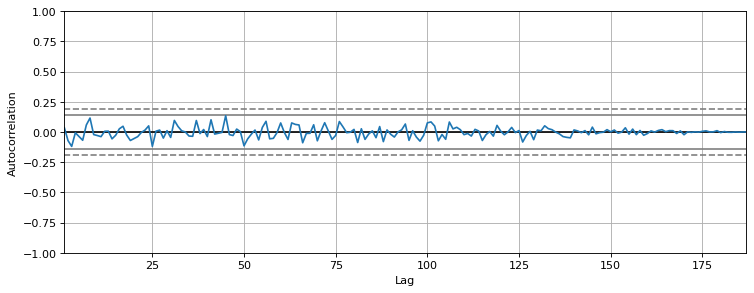

In [23]:
plt.figure(figsize = (11,4),dpi=80)
pd.plotting.autocorrelation_plot(by_date)

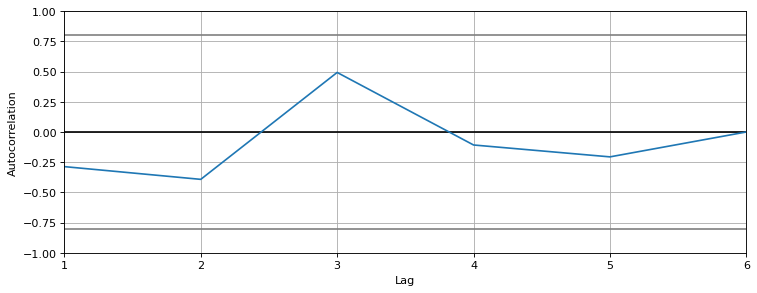

In [24]:
plt.figure(figsize = (11,4),dpi=80)
pd.plotting.autocorrelation_plot(by_date.loc['2014-02':'2014-03','Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


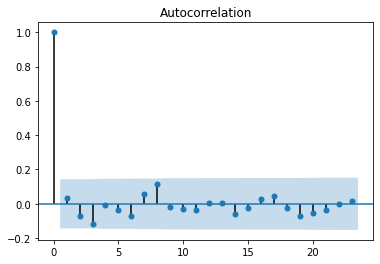

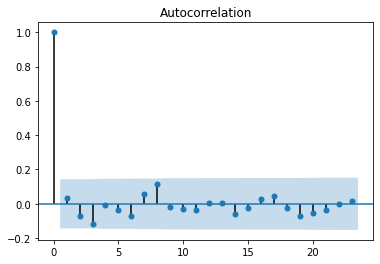

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(by_date)

In [26]:
data_diff = by_date.diff(periods=1)
data_diff.head()

,Sales
Order Date,
2014-01-13,NaN
2014-01-19,-364.47
2014-01-26,-106.23
2014-02-04,102.44
2014-03-08,41.07


In [27]:
data_diff = data_diff.dropna()
data_diff.head()

,Sales
Order Date,
2014-01-19,-364.47
2014-01-26,-106.23
2014-02-04,102.44
2014-03-08,41.07
2014-03-14,921.17


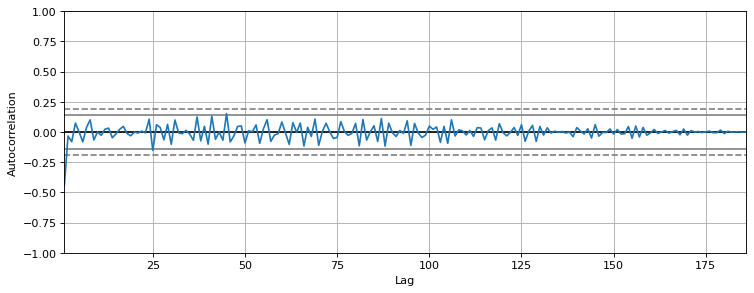

In [28]:
plt.figure(figsize = (11,4),dpi=80)
pd.plotting.autocorrelation_plot(data_diff)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df_lags=by_date

In [31]:
for i in range(1,5):
  df_lags['lags_{}'.format(i)]=df_lags.Sales.shift(i)

In [32]:
df_lags.head()

,Sales,lags_1,lags_2,lags_3,lags_4
Order Date,,,,,
2014-01-13,545.94,NaN,NaN,NaN,NaN
2014-01-19,181.47,545.94,NaN,NaN,NaN
2014-01-26,75.24,181.47,545.94,NaN,NaN
2014-02-04,177.68,75.24,181.47,545.94,NaN
2014-03-08,218.75,177.68,75.24,181.47,545.94


In [33]:
df_lags = df_lags.iloc[4:]
df_lags.head()

,Sales,lags_1,lags_2,lags_3,lags_4
Order Date,,,,,
2014-03-08,218.750,177.680,75.240,181.47,545.94
2014-03-14,1139.920,218.750,177.680,75.24,181.47
2014-03-21,251.328,1139.920,218.750,177.68,75.24
2014-03-22,314.352,251.328,1139.920,218.75,177.68
2014-03-28,1184.720,314.352,251.328,1139.92,218.75


In [34]:
X=df_lags

In [35]:
Y = df_lags.Sales

In [40]:
Y = Y.reset_index(drop=True)
Y[:10]

0     218.750
1    1139.920
2     251.328
3     314.352
4    1184.720
5     561.584
6     149.900
7     275.490
8     104.010
9       4.272
Name: Sales, dtype: float64

In [43]:
X = X.reset_index(drop=True)
X.head()

,Sales,lags_1,lags_2,lags_3,lags_4
0,218.750,177.680,75.240,181.47,545.94
1,1139.920,218.750,177.680,75.24,181.47
2,251.328,1139.920,218.750,177.68,75.24
3,314.352,251.328,1139.920,218.75,177.68
4,1184.720,314.352,251.328,1139.92,218.75


In [63]:
def TimeSeriesTrainTestSplit(x,y,test_size):
  test_index = int(len(x)*(1-test_size))

  X_train = x.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = x.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train,y_train,X_test,y_test

In [44]:
X_train,y_train,X_test,y_test = TimeSeriesTrainTestSplit(X,Y,0.33)
print(X_train.shape, X_test.shape)

(122, 5) (61, 5)


In [45]:
print(y_train.shape, y_test.shape)

(122,) (61,)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.neighbors import KNeighborsClassifier

In [46]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = regressor.predict(X_test)

In [49]:
mse = mean_squared_error(y_test,y_pred)
mse

1.2251350749450536e-24

In [50]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1.1068582000170816e-12

In [51]:
r2=r2_score(y_test,y_pred)
r2

1.0

In [52]:
mae=mean_absolute_error(y_test,y_pred)
mae

7.67182310393436e-13

In [58]:
y_test = y_test.reset_index(drop=True)
y_test

0      195.136
1      343.920
2     1639.392
3      564.195
4      377.450
        ...   
56     504.900
57     115.378
58    1259.466
59      72.704
60     850.920
Name: Sales, Length: 61, dtype: float64

In [56]:
y_pred1=pd.Series(y_pred)

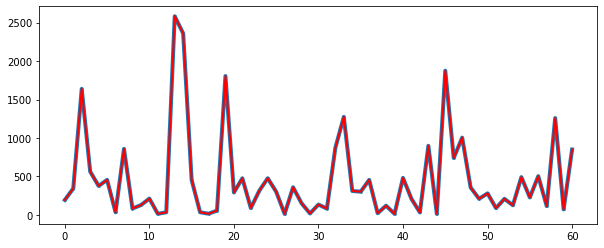

In [59]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(y_test[:100], marker='.', linewidth=4, markersize=3, label='Real_value')
ax.plot(y_pred1[:100], markersize=3, linewidth=2, color='red', label='LR Prediction')

In [60]:
Xar = df_lags.Sales
Xar = Xar.reset_index(drop=True)
Xar

0       218.750
1      1139.920
2       251.328
3       314.352
4      1184.720
         ...   
178     504.900
179     115.378
180    1259.466
181      72.704
182     850.920
Name: Sales, Length: 183, dtype: float64

In [61]:
Yar = Y
Yar.head()

0     218.750
1    1139.920
2     251.328
3     314.352
4    1184.720
Name: Sales, dtype: float64

In [64]:
X_trainAR, y_trainAR, X_testAR, y_testAR = TimeSeriesTrainTestSplit(Xar, Yar, 0.33)
print(X_trainAR.shape, y_trainAR.shape, X_testAR.shape, y_testAR.shape)

(122,) (122,) (61,) (61,)


In [65]:
model_ar = AR(X_trainAR)
model_ar_fit = model_ar.fit()

In [66]:
predictionsAR = model_ar_fit.predict(X_trainAR.size, X_trainAR.size+X_testAR.size-1)

In [67]:
mseAR = mean_squared_error(y_testAR,predictionsAR)
mseAR

344135.98368259147

In [68]:
rmseAR = np.sqrt(mseAR)
rmseAR

586.6310456177644

In [69]:
r2AR = r2_score(y_testAR,predictionsAR)
r2AR

-0.05555596073142244

In [70]:
maeAR=mean_absolute_error(y_testAR,predictionsAR)
maeAR

458.34611518537434

In [71]:
y_testAR = y_testAR.reset_index(drop=True)
predictionsAR = predictionsAR.reset_index(drop=True)

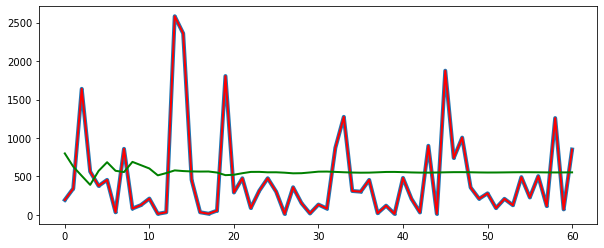

In [72]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(y_test[:100], marker='.', linewidth=4, markersize=3, label='Real_value')
ax.plot(y_pred1[:100], markersize=3, linewidth=2, color='red', label='LR Prediction')
ax.plot(predictionsAR.loc[:100], markersize=3, linewidth=2, color='green', label='AR Prediction')

In [73]:
model_arima = ARIMA(X_trainAR, order=(7, 2, 3))
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [74]:
predictionsARIMA = model_arima_fit.forecast(X_testAR.size)[0]

In [75]:
predictionsARIMA.size

61

In [76]:
mseARIMA = mean_squared_error(y_test,predictionsARIMA)
mseARIMA

485812.4569101409

In [77]:
rmseARIMA = np.sqrt(mseARIMA)
rmseARIMA

697.0024798450439

In [78]:
r2ARIMA = r2_score(y_test,predictionsARIMA)
r2ARIMA

-0.4901151260080139

In [79]:
maeARIMA=mean_absolute_error(y_test,predictionsARIMA)
maeARIMA

456.188566446066

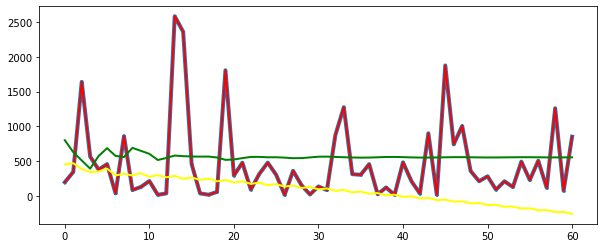

In [80]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(y_test[:100], marker='.', linewidth=4, markersize=3, label='Real_value')
ax.plot(y_pred1[:100], markersize=3, linewidth=2, color='red', label='LR Prediction')
ax.plot(predictionsAR.loc[:100], markersize=3, linewidth=2, color='green', label='AR Prediction')
ax.plot(predictionsARIMA[:100], markersize=3, linewidth=2, color='yellow', label='ARIMA Prediction')

In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [85]:
predictionKNNR = knnr.predict(X_test)

In [86]:
mseKNNR = mean_squared_error(y_test,predictionKNNR)
mseKNNR

39943.0535998282

In [87]:
rmseKNNR = np.sqrt(mseKNNR)
rmseKNNR

199.85758329327462

In [89]:
r2KNNR = r2_score(y_test,predictionKNNR)
r2KNNR

0.8774841042022478

In [90]:
maeKNNR=mean_absolute_error(y_test,predictionKNNR)
maeKNNR

139.2755475409836

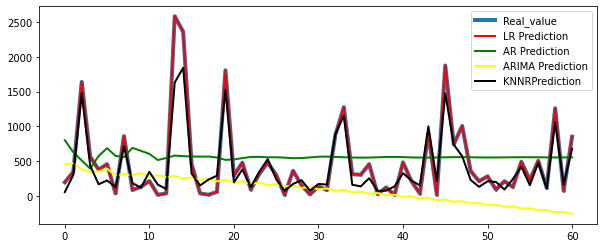

In [91]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(y_test[:100], marker='.', linewidth=4, markersize=3, label='Real_value')
ax.plot(y_pred1[:100], markersize=3, linewidth=2, color='red', label='LR Prediction')
ax.plot(predictionsAR.loc[:100], markersize=3, linewidth=2, color='green', label='AR Prediction')
ax.plot(predictionsARIMA[:100], markersize=3, linewidth=2, color='yellow', label='ARIMA Prediction')
ax.plot(predictionKNNR[:100], markersize=3, linewidth=2, color='black', label='KNNRPrediction')
plt.legend()
plt.show()